## 1. 概述

* 李航《统计学习方法》（第一版）主要包括如下十大模型方法：
    * 感知机，Perceptron
    * K近邻，KNN，k-nearest neighbor
    * 朴素贝叶斯，NB，naive bayes
    * 决策树，DT，decision tree
    * 逻辑斯谛回归，LR，logistic regression
    * 支持向量机，SVM，support vector machines
    * 提升方法，Boosting
    * 期望最大化，EM，expectation maximization
    * 隐马尔科夫，HMM，hidden markov
    * 条件随机场，CRF，conditional random field
    
记忆口诀：感邻贝树逻，S提E马随

形象解释：为了感谢邻居背着一箩筐小树苗，还有四个蹄子的一匹马跟在身后

代码链接：https://github.com/fengdu78/lihang-code

* SKlearn 主要包含如下六大模块：
    * 分类
    * 回归
    * 聚类
    * 降维
    * 模型选择
    * 数据预处理
    
![](./sklearn.png)

* XGBoost 向来被称为处理 Kaggle 竞赛中非感知数据的刷榜神器，演化路线如下：

![](./xgboost.jpg)

## 2. 环境
* pip install scikit-learn
* pip install xgboost

本文主要基于最简单的分类数据集IRIS做简单演示，对比SVM和XGBoost的效果。

## 3. SVM

### 3.1 数据及模型和评测

In [4]:
from sklearn import datasets  # 导入自带数据集
from sklearn import svm  # 导入svm模块
from sklearn.model_selection import train_test_split  # 数据集划分

In [9]:
iris = datasets.load_iris()  # 数据的加载
X, Y = iris.data, iris.target  # 输入及输出
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
print(X.shape,
      Y.shape,
      X_train.shape,
      X_test.shape,
      Y_train.shape,
      Y_test.shape)

(150, 4) (150,) (120, 4) (30, 4) (120,) (30,)


In [10]:
model = svm.SVC()  # 初始化模型
model.fit(X_train, Y_train)  # 训练

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [11]:
model.score(X_test, Y_test)

0.93333333333333335

### 3.2 模型序列化及推理

In [13]:
from sklearn.externals import joblib  # 环境

joblib.dump(model, "iris-svm.pkl")  # 序列化

['iris-svm.pkl']

In [18]:
model_iris_svm = joblib.load("iris-svm.pkl")  # 加载模型
out_ = model_iris_svm.predict(X_test[0, :])
real = Y_test[0]
print(out_, real)

[2] 2


C:\App\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


## 4. XGBoost

参考1：https://www.kdnuggets.com/2017/03/simple-xgboost-tutorial-iris-dataset.html

参考2：https://zhuanlan.zhihu.com/p/31182879

### 4.1 简单入手

In [19]:
import xgboost as xgb  # 环境

In [20]:
# 将 numpy 数据转化为 xgboost 的 DMatrix 数据
d_train = xgb.DMatrix(X_train, label=Y_train)  # 训练集
d_test = xgb.DMatrix(X_test, label=Y_test)  # 测试集

In [36]:
# XGBoost 参数设置：不同的数据集使用不同的参数会表现得更好
params = {
    'booster': 'gbtree',
    'objective': 'multi:softmax',
    'num_class': 3,
    'gamma': 0.1,
    'max_depth': 6,
    'lambda': 2,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'min_child_weight': 3,
    'silent': 1,
    'eta': 0.1,
    'seed': 1000,
    'nthread': 4,
}

num_round = 500  # the number of training iterations

In [44]:
# 模型训练
model_iris_xgboost = xgb.train(param, d_train, num_round)

In [45]:
# 模型结构
model_iris_xgboost.dump_model("iris_xgboost.txt")

In [46]:
# 模型推理
model_iris_xgboost.predict(d_test)

array([[  7.23272283e-03,   2.63873991e-02,   9.66379821e-01],
       [  9.87908781e-01,   1.08116809e-02,   1.27950928e-03],
       [  1.47451961e-03,   1.07322144e-03,   9.97452199e-01],
       [  2.37509632e-03,   9.96875167e-01,   7.49728351e-04],
       [  4.49852832e-03,   9.93392050e-01,   2.10937834e-03],
       [  1.47450750e-03,   1.08149787e-03,   9.97444034e-01],
       [  4.35259007e-03,   9.90142465e-01,   5.50486334e-03],
       [  9.92838919e-01,   5.87525545e-03,   1.28589466e-03],
       [  4.09123302e-03,   9.88222539e-01,   7.68627552e-03],
       [  7.77279818e-03,   9.87108409e-01,   5.11880685e-03],
       [  5.63382776e-03,   9.91724432e-01,   2.64172326e-03],
       [  5.09332819e-03,   9.92518425e-01,   2.38828105e-03],
       [  9.92493451e-01,   6.22116169e-03,   1.28544716e-03],
       [  9.87908781e-01,   1.08116809e-02,   1.27950928e-03],
       [  4.05580401e-02,   6.63167238e-01,   2.96274751e-01],
       [  4.78960527e-03,   9.93698478e-01,   1.5118985

* 实际上输出数据的每一列分别代表对应的类别号 0、1、2
* 对每个数据点选择对应行概率最高那一列的索引作为最终的输出结果

In [56]:
import numpy as np

result = np.array([np.argmax(line) for line in model_iris_xgboost.predict(d_test)])

print(result)

[2 0 2 1 1 2 1 0 1 1 1 1 0 0 1 1 0 1 0 1 1 2 1 1 1 1 1 1 2 1]


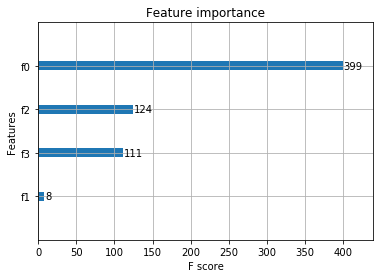

In [51]:
# 显示重要特征
import matplotlib.pyplot as plt
from xgboost import plot_importance
plot_importance(model_iris_xgboost)
plt.show()

### 4.2 存储推理

In [49]:
# 测评结果
from sklearn.metrics import precision_score

precision_score(Y_test, result, average="macro")

0.91228070175438603

In [30]:
# 序列化
joblib.dump(model_iris_xgboost, "iris_xgboost.pkl", compress=True)

['iris_xgboost.pkl']

In [59]:
# 加载
model_iris_xgboost = joblib.load("iris_xgboost.pkl")
# 升维
x = np.expand_dims(X_test[0, :], axis=0)
print(X_test[0, :].shape, x.shape)
x = xgb.DMatrix(x)
# 推理
out_ = np.argmax(model_iris_xgboost.predict(x))
# 结果           
real = Y_test[0]
print(out_, real)

(4,) (1, 4)
2 2
